**Graphic Vizualization of Stock Price for Technical Analysis**

> `Indented block`



---



```
# This is formatted as code
```



**This article would focus on learnng to importing archive data of specific stock from yahoo finanace, carrying out necessary data engineering to meet the requirement of creating basic visualizations of Simple Moving Average of that specific stock. This Graph may be used for carrying out technical analysis of the specific stock and prepare trading strategies:-

Now a word about environment. We would use Jupyter Notebook in Google Colab. To set the environment load basic libraries such as pandas, numpy, Mathplot for data frame manipultion, mathematical functions and plotting of graphs respectively. In addition import yfinance library. You may require to install the package yfinance if not already installed before importing.

In [ ]:
import pandas as pd
#!pip install yfinance
import yfinance as yf

In [ ]:
Todays_Date = input("Please Enter Date in YYYY-MM-DD Format : ")

Please Enter Date in YYYY-MM-DD Format : 2022-02-28


In [ ]:
Todays_Date 

'2022-02-28'

Next step is to get the correct Stock code identifier for specific stock. This you would get using the search engine at Yahoo Finance. In this specific article, we  would use the archive data of ITC Stock in NSE(Stock identifier is ITC.NS).

In [ ]:
ITC= yf.download('ITC.NS',start='2015-01-01',end= Todays_Date,progress=False)

We would now explore the newly created dataframe. To see the first five rows of the dtaframe execute the below given command. I could either use Adj Close(Adjusted Closing Price) or Close (Closing Price) field to move ahead and carry out further analysis.

In [ ]:
ITC.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-21,220.300003,221.300003,217.149994,218.000000,218.000000,16129017
2022-02-22,215.000000,216.899994,213.000000,214.850006,214.850006,25749340
2022-02-23,216.800003,217.500000,215.050003,215.949997,215.949997,11014283
2022-02-24,210.000000,213.300003,207.000000,208.500000,208.500000,41341523
2022-02-25,211.500000,216.500000,210.550003,213.949997,213.949997,23633656


The next step would be to create a new dataframe from the existing ITC data-frame. In this process of feature engineering we would retain only those features which would be required for this Simple Moving Averages for specfic technical Analysis. To commence with we would retain only the Close field by executing the command given below

In [ ]:
ITC_1= ITC.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis =1)
ITC_1.head(3)

,Close
Date,
2015-01-01,244.766663
2015-01-02,245.533340
2015-01-05,246.500000


Next, we would Calculate minimum, maximum, standard deviation, median and exponentially weighted moving average by executing the command below. Please note this calculations are rolling for a window of 20 days. If ITC_1.head(20) would be executed, it would be seen that these values are being calculated from the 20th data-frame 

In [ ]:
window =20
ITC_1['min']= ITC_1['Close'].rolling(window= window).min()
ITC_1['max']= ITC_1['Close'].rolling(window= window).max()
ITC_1['mean']= ITC_1['Close'].rolling(window= window).mean()
ITC_1['std']= ITC_1['Close'].rolling(window= window).std()
ITC_1['median']= ITC_1['Close'].rolling(window= window).median()
ITC_1['ewma'] = ITC_1['Close'].ewm(halflife=0.5, min_periods=window).mean()
ITC_1.head(20)

,Close,min,max,mean,std,median,ewma
Date,,,,,,,
2015-01-01,244.766663,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,245.533340,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,246.500000,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,240.166672,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,235.699997,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,241.600006,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,237.933334,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,238.566666,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-13,240.066666,NaN,NaN,NaN,NaN,NaN,NaN


To plot the graph, we need to ensure that required library, to be specific Mathplotlib.pyplot has been imported into the current environment. In the graph being created only three values from the dataframe ITC_1 that is 'min', 'mean', 'max' would be used. To ensure that graph created is adequately visible only last 200 values from the end date(Tail) would utilized. The min and max would be displayed by green colour where as mean would be displayed by red colour in the graph.

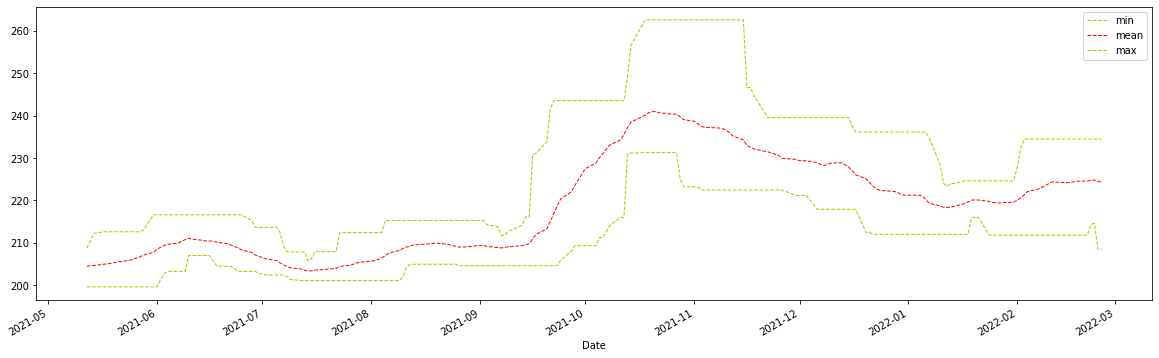

In [ ]:
ax = ITC_1[['min','mean', 'max']].iloc[-200:].plot(figsize=(20,6), style =['y--', 'r--', 'y--'], lw = 1.0)

Next we would creat Simmple Moving Average of Closing prrice for a rolling window of 42 days and 242 days respectively which we would use to creat the graph going ahead. This would be carried out by executing the undermentioned command:-

In [ ]:
ITC_1['SMA1'] = ITC_1['Close'].rolling(window=42).mean() 
ITC_1['SMA2'] = ITC_1['Close'].rolling(window=252).mean() 
ITC_1[['Close', 'SMA1', 'SMA2']].tail()

,Close,SMA1,SMA2
Date,,,
2022-02-21,218.000000,222.094048,217.261111
2022-02-22,214.850006,222.035715,217.247619
2022-02-23,215.949997,221.986905,217.240476
2022-02-24,208.500000,221.771429,217.199405
2022-02-25,213.949997,221.626191,217.191468


Going ahead using the three values of the dataset i.e Close, Simple Moving Average for 42 and 242 days respectively, we would creat a graph depicting these three values.This would be carried out by executing the commands mentioned below:-

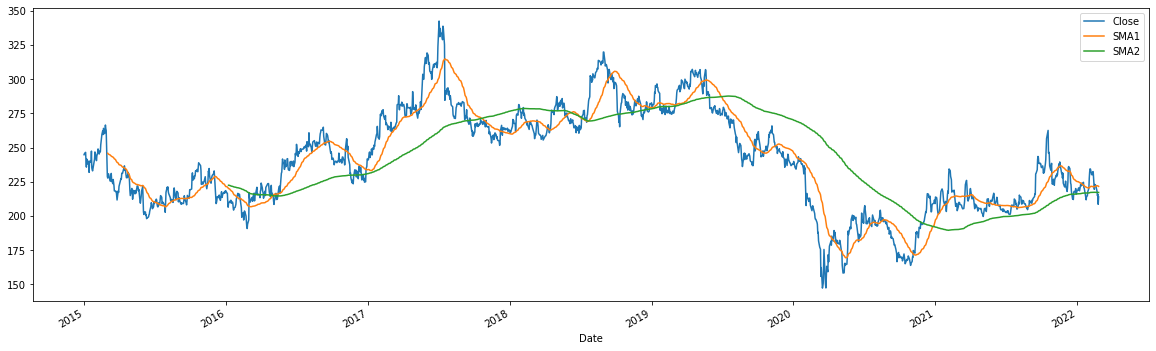

In [ ]:
ITC_1[['Close', 'SMA1', 'SMA2']].plot(figsize=(20, 6));

The final step is to generate positions i.e to buy or sell. We would create another column or field in the dataframe as postion which would be 1, it would dictate that stock is on upward trend and  -1, would denote that the stock is on downward trend these in turn could be utilized for preparing tradig strategy. The position would be denoted with bold red line in the graph. All this would be achieved by executing the command given below:-

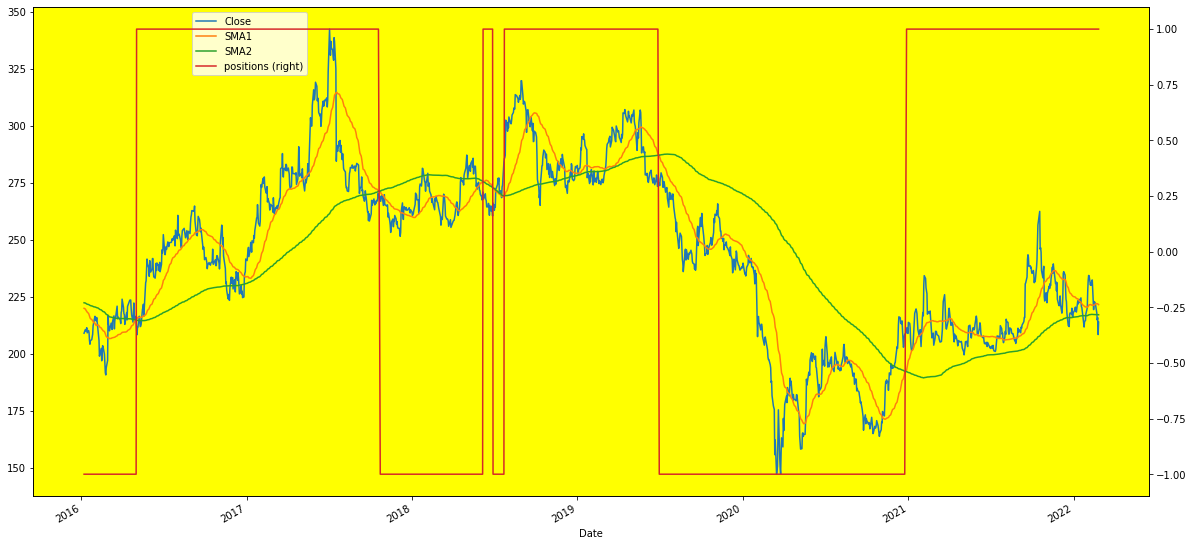

In [ ]:
import numpy as np
ITC_1.dropna(inplace=True) 
ITC_1['positions'] = np.where(ITC_1['SMA1'] > ITC_1['SMA2'], 1,  -1)
ax = ITC_1[['Close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(20, 10), secondary_y='positions', )
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
ax.set_facecolor("yellow");


I have written this article for those who are just been intiated into the field of data visualization and have basic knowlege about tecnical analysis of stocks. The material created above is specifically for educating myself and share knowledge about data vizualization.